In [1]:
import pandas as pd
import numpy as np
# Load the CSV 
data = pd.read_csv('A:/10x/10X_Acadamy/Data/yfinance_data/yfinance_data/AAPL_historical_data.csv')


In [2]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [3]:
# Display summary statistics
print(data.describe())

               Open          High           Low         Close     Adj Close  \
count  10998.000000  10998.000000  10998.000000  10998.000000  10998.000000   
mean      22.299160     22.539055     22.068367     22.312754     21.494496   
std       46.003685     46.496031     45.540929     46.037660     45.561916   
min        0.049665      0.049665      0.049107      0.049107      0.037857   
25%        0.299107      0.303710      0.290179      0.298549      0.241840   
50%        0.531250      0.537946      0.522321      0.531250      0.432079   
75%       20.204196     20.389554     19.998036     20.196160     17.253029   
max      236.479996    237.229996    233.089996    234.820007    234.548523   

             Volume     Dividends  Stock Splits  
count  1.099800e+04  10998.000000  10998.000000  
mean   3.180806e+08      0.000752      0.001546  
std    3.354523e+08      0.011753      0.083663  
min    0.000000e+00      0.000000      0.000000  
25%    1.132545e+08      0.000000     

In [4]:
print(data.isnull().sum())

Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10998 entries, 0 to 10997
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          10998 non-null  object 
 1   Open          10998 non-null  float64
 2   High          10998 non-null  float64
 3   Low           10998 non-null  float64
 4   Close         10998 non-null  float64
 5   Adj Close     10998 non-null  float64
 6   Volume        10998 non-null  int64  
 7   Dividends     10998 non-null  float64
 8   Stock Splits  10998 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 773.4+ KB


In [6]:
data.shape

(10998, 9)

### checking Outliers

In [8]:
from scipy import stats

# Calculate Z-scores for the numerical columns
z_scores = stats.zscore(data[['Open', 'High', 'Low', 'Close', 'Volume']])
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3).all(axis=1)

# Add a column
data['is_outlier'] = outliers


In [9]:
data.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
is_outlier      0
dtype: int64

In [11]:
# Calculate IQR for each numerical column
Q1 = data[['Open', 'High', 'Low', 'Close', 'Volume']].quantile(0.25)
Q3 = data[['Open', 'High', 'Low', 'Close', 'Volume']].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = (data[['Open', 'High', 'Low', 'Close', 'Volume']] < lower_bound) | (data[['Open', 'High', 'Low', 'Close', 'Volume']] > upper_bound)
data['is_outlier_iqr'] = outliers.any(axis=1)


Visualizing the outliers

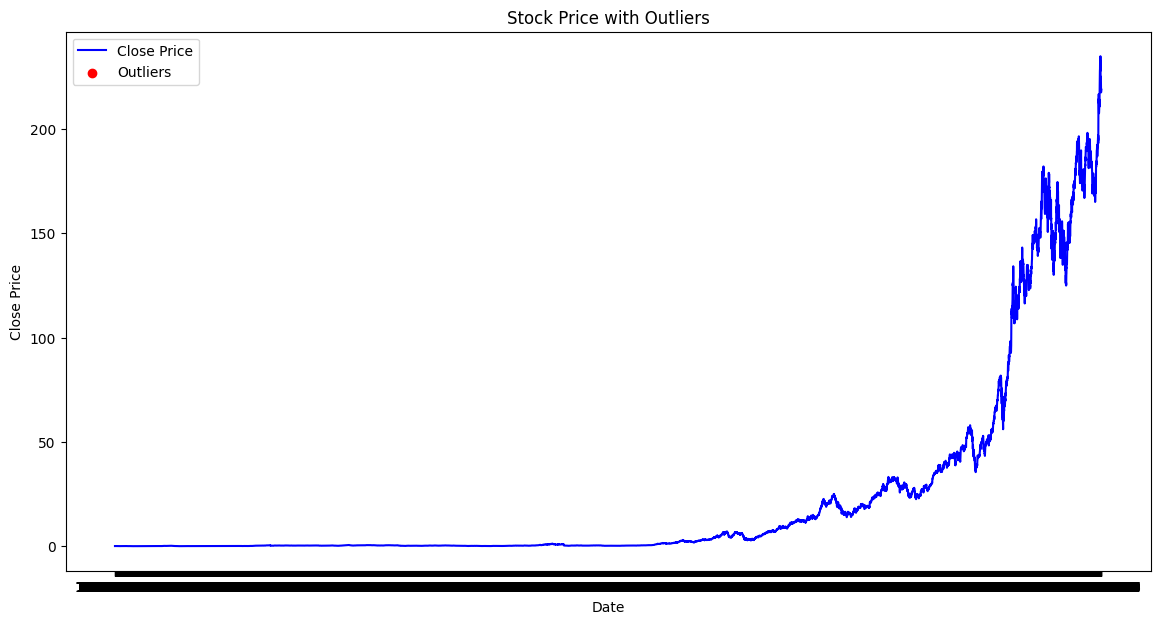

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
plt.scatter(data['Date'][data['is_outlier']], data['Close'][data['is_outlier']], color='red', label='Outliers')
plt.title('Stock Price with Outliers')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


SO, We have no outliers

### Apply Technical Indicators with TA-Lib

In [19]:
import talib

#Calculate Moving Averages (20-day SMA)
data['SMA_20'] = talib.SMA(data['Close'], timeperiod=20)




In [20]:
#Calculate RSI (Relative Strength Index):

data['RSI'] = talib.RSI(data['Close'], timeperiod=14)


In [21]:
#Calculate MACD (Moving Average Convergence Divergence):
data['MACD'], data['MACD_signal'], data['MACD_hist'] = talib.MACD(data['Close'], 
                                                             fastperiod=12, 
                                                             slowperiod=26, 
                                                             signalperiod=9)

### Visualize the Data

In [23]:
import pynance as pn

# Calculate daily returns
data['daily_return'] = data['Close'].pct_change()

# Example calculation of Sharpe Ratio
sharpe_ratio = data['daily_return'].mean() / data['daily_return'].std() * (252**0.5)
print(f"Sharpe Ratio: {sharpe_ratio}")


Sharpe Ratio: 0.6103725365865273


Plot Stock Price and Indicators:

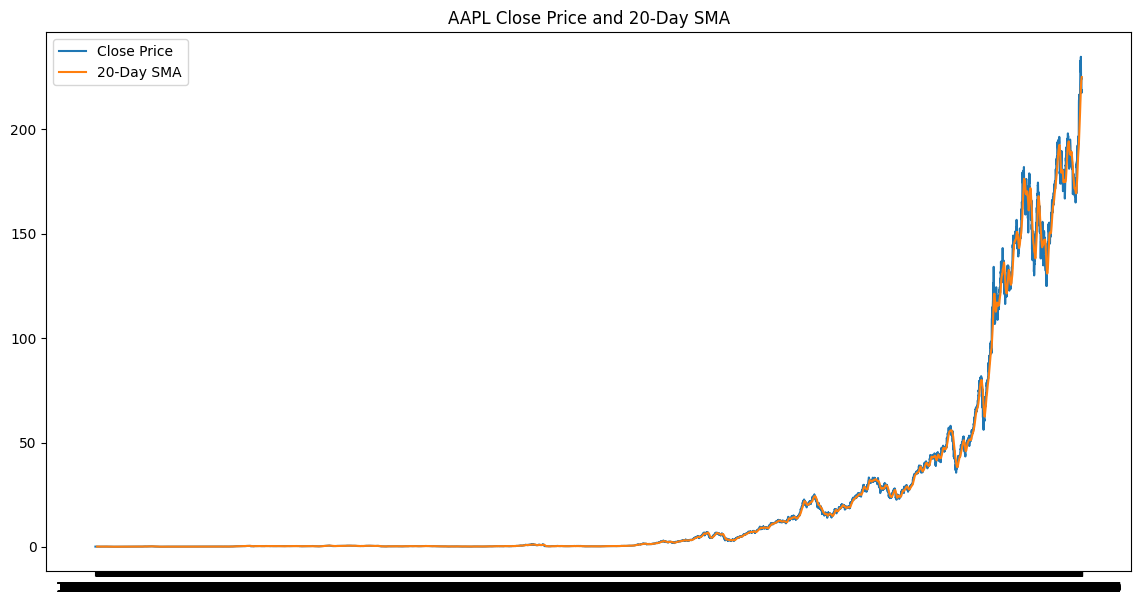

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,7))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.plot(data['Date'], data['SMA_20'], label='20-Day SMA')
plt.title('AAPL Close Price and 20-Day SMA')
plt.legend()
plt.show()


Plot RSI and MACD:

Text(0.5, 1.0, 'RSI')

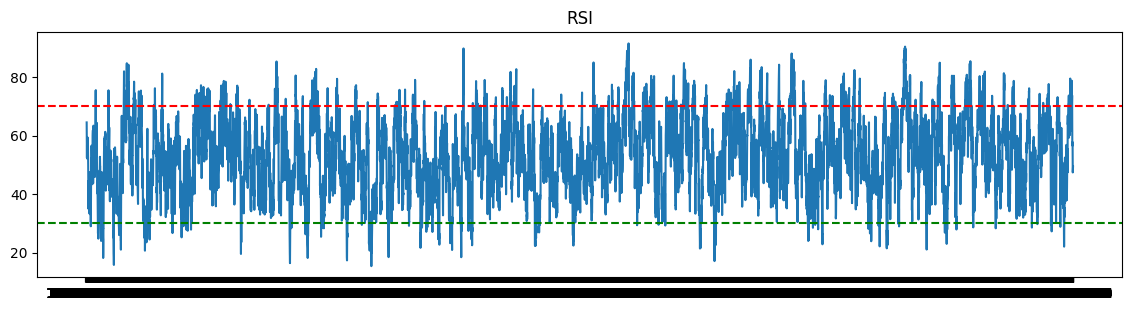

In [26]:
plt.figure(figsize=(14,7))
plt.subplot(2, 1, 1)
plt.plot(data['Date'], data['RSI'], label='RSI')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('RSI')




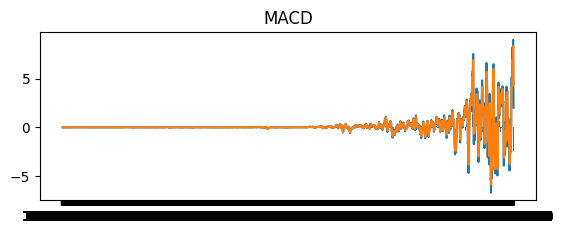

In [27]:
plt.subplot(2, 1, 2)
plt.plot(data['Date'], data['MACD'], label='MACD')
plt.plot(data['Date'], data['MACD_signal'], label='Signal Line')
plt.bar(data['Date'], data['MACD_hist'], label='MACD Histogram')
plt.title('MACD')
plt.show()